dropout 적용

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
# 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512, activation ='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation ='softmax'))

In [7]:
# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

Epoch 1/12
391/391 - 20s - loss: 1.6940 - accuracy: 0.3758 - val_loss: 1.3230 - val_accuracy: 0.5187 - 20s/epoch - 50ms/step
Epoch 2/12
391/391 - 7s - loss: 1.2710 - accuracy: 0.5423 - val_loss: 1.0864 - val_accuracy: 0.6159 - 7s/epoch - 18ms/step
Epoch 3/12
391/391 - 7s - loss: 1.1006 - accuracy: 0.6081 - val_loss: 0.9759 - val_accuracy: 0.6505 - 7s/epoch - 18ms/step
Epoch 4/12
391/391 - 7s - loss: 0.9892 - accuracy: 0.6512 - val_loss: 0.9212 - val_accuracy: 0.6746 - 7s/epoch - 17ms/step
Epoch 5/12
391/391 - 7s - loss: 0.9130 - accuracy: 0.6783 - val_loss: 0.8541 - val_accuracy: 0.7015 - 7s/epoch - 17ms/step
Epoch 6/12
391/391 - 7s - loss: 0.8467 - accuracy: 0.6999 - val_loss: 0.8481 - val_accuracy: 0.7046 - 7s/epoch - 18ms/step
Epoch 7/12
391/391 - 7s - loss: 0.7935 - accuracy: 0.7189 - val_loss: 0.7377 - val_accuracy: 0.7423 - 7s/epoch - 18ms/step
Epoch 8/12
391/391 - 7s - loss: 0.7601 - accuracy: 0.7319 - val_loss: 0.7166 - val_accuracy: 0.7489 - 7s/epoch - 18ms/step
Epoch 9/12
391

In [8]:
# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은", res[1]*100)

정확률은 77.0799994468689


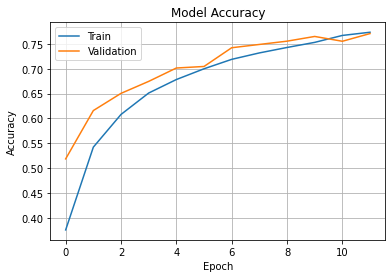

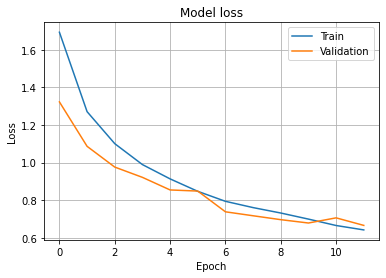

In [9]:
import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

In [17]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

conv2d_7 (3, 3, 3, 32)
conv2d_8 (3, 3, 32, 32)
conv2d_9 (3, 3, 32, 64)
conv2d_10 (3, 3, 64, 64)


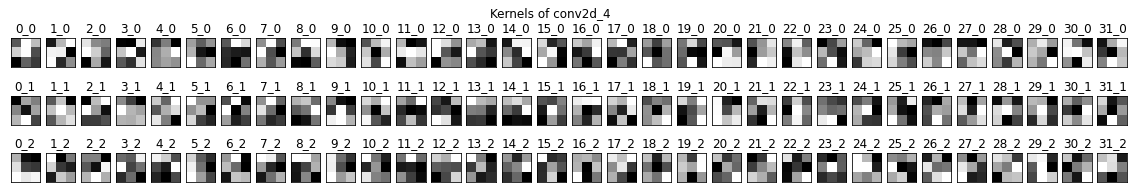

conv2d_7 (None, 30, 30, 32)
conv2d_8 (None, 28, 28, 32)
conv2d_9 (None, 12, 12, 64)
conv2d_10 (None, 10, 10, 64)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


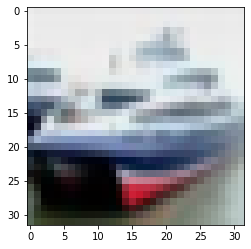

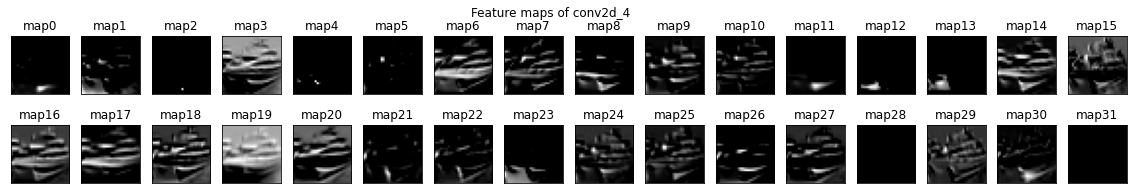

In [21]:
for layer in cnn.layers:
  if 'conv' in layer.name:
    kernel,biases = layer.get_weights()
    print(layer.name, kernel.shape)

kernel, biases = cnn.layers[0].get_weights()
minv, maxv = kernel.min(), kernel.max()
kernel=(kernel-minv)/(maxv-minv)
n_kernel=32

plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2d_4")
for i in range(n_kernel):
  f=kernel[:,:,:,i]
  for j in range(3):
    plt.subplot(3, n_kernel, j*n_kernel+i+1)
    plt.imshow(f[:,:,j],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(str(i)+'_'+str(j))
plt.show()

for layer in cnn.layers:
  if 'conv' in layer.name:
    print(layer.name, layer.output.shape)

from tensorflow.keras.models import Model

partial_model=Model(inputs=cnn.inputs, outputs=cnn.layers[0].output)
partial_model.summary()

feature_map = partial_model.predict(x_test)
fm=feature_map[1]

plt.imshow(x_test[1])

plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d_4")
for i in range(32):
  plt.subplot(2, 16,i+1)
  plt.imshow(fm[:,:,i],cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title("map"+str(i))
plt.show()


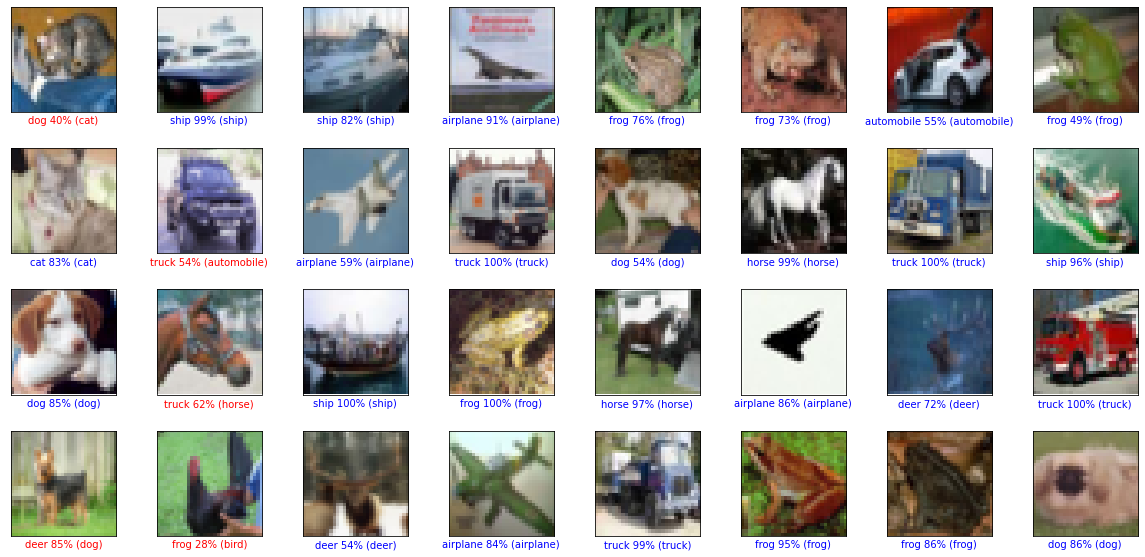

In [10]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] 
predictions = cnn.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

num_rows = 4
num_cols = 8
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()